# Multi-Class Classification 

> Using tensorflow Multi-Layer Perceptrons on the MNIST dataset

## Dataset Loading and Exploration

In [1]:
from tensorflow.keras.datasets import mnist

2025-11-09 01:41:24.040907: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-09 01:41:24.083561: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-09 01:41:24.347635: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-09 01:41:24.349588: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-09 01:41:26.162934: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print("X_train shape: ", X_train.shape) 
print("X_test shape: ", X_test.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)


Target value:  5


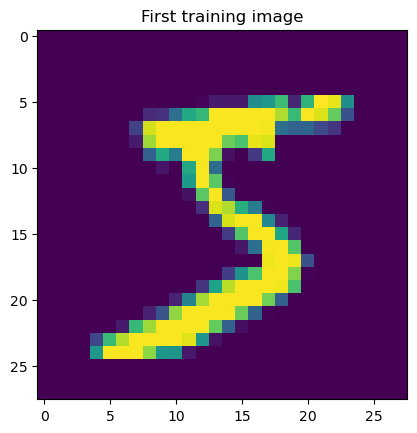

In [6]:
from matplotlib import pyplot as plt 

plt.title("First training image") 
plt.imshow(X_train[0]) 

print("Target value: ", y_train[0])

### Data Preparation

In [7]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0 

In [8]:
print("Train min: ", X_train_norm.min()) 
print("Train max: ", X_train_norm.max()) 

print("Test min: ", X_test_norm.min()) 
print("Test max: ", X_test_norm.max()) 

Train min:  0.0
Train max:  1.0
Test min:  0.0
Test max:  1.0


### Architecture

In [9]:
import tensorflow as tf 
import numpy as np

In [11]:
tf.random.set_seed(7)

In [12]:
model = tf.keras.models.Sequential() 

In [14]:
from tensorflow.keras.layers import Dense, Flatten

In [16]:
flattening_layer = Flatten(input_shape=(28, 28))

In [17]:
fc_layer = Dense(
    units=256, 
    activation='ReLU'
) 

clf_layer = Dense(
    units=10, 
    activation='softmax'
) 


In [18]:
model.add(flattening_layer) 
model.add(fc_layer) 
model.add(clf_layer)

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 

In [20]:
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
) 
    

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training and Evaluation

In [22]:
history = model.fit(
    x=X_train_norm,
    y=y_train,
    epochs=5, 
    validation_split=0.2
) 

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2490 - accuracy: 0.9280 - val_loss: 0.1352 - val_accuracy: 0.9605
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1018 - accuracy: 0.9698 - val_loss: 0.0945 - val_accuracy: 0.9719
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0678 - accuracy: 0.9795 - val_loss: 0.0845 - val_accuracy: 0.9752
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0812 - val_accuracy: 0.9758
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0814 - val_accuracy: 0.9753


In [23]:
model.evaluate(
    x=X_test_norm,
    y=y_test
) 

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9774


[0.0753645971417427, 0.977400004863739]

### Analysis

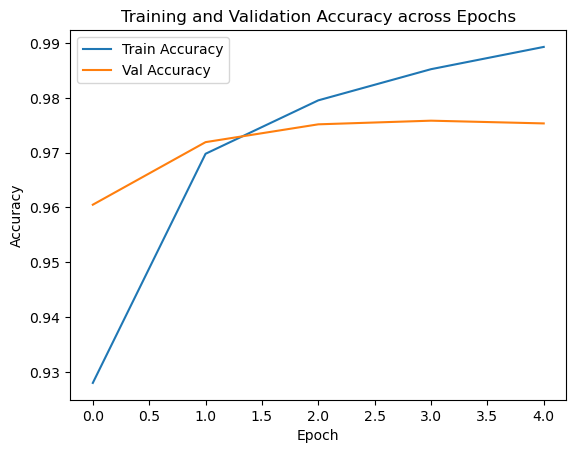

In [26]:
plt.plot(
    history.history['accuracy'], 
    label="Train Accuracy" 
) 
plt.plot(
    history.history['val_accuracy'],
    label="Val Accuracy" 
) 
plt.ylabel("Accuracy") 
plt.xlabel("Epoch") 
plt.title("Training and Validation Accuracy across Epochs")
plt.legend()
plt.show()

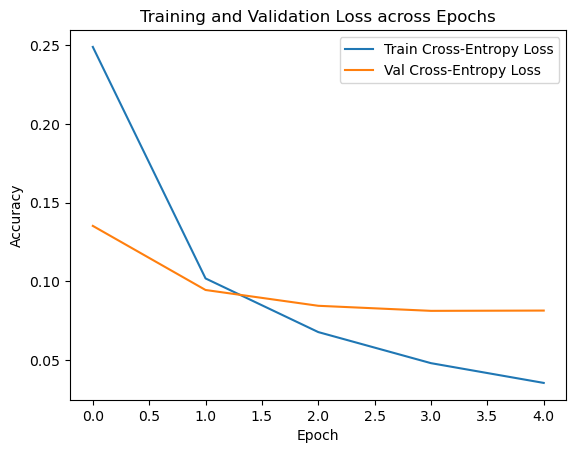

In [29]:
plt.plot(
    history.history['loss'], 
    label="Train Cross-Entropy Loss" 
) 
plt.plot(
    history.history['val_loss'],
    label="Val Cross-Entropy Loss" 
) 
plt.ylabel("Accuracy") 
plt.xlabel("Epoch") 
plt.title("Training and Validation Loss across Epochs")
plt.legend()
plt.show()

- Try reducing learning rate 

In [36]:
test_probs = model.predict(X_test_norm) 

print("First test sample probabilities: ", test_probs[0])

313/313 [==============================] - 1s 2ms/step
First test sample probabilities:  [5.5080085e-10 2.8142891e-10 7.1189783e-07 9.7508755e-06 3.6369830e-14
 6.2331380e-09 3.1812337e-12 9.9998951e-01 1.6907302e-08 2.8167406e-08]


In [37]:
print("First test sample prediction (most likely): ", np.argmax(test_probs[0]))

First test sample prediction (most likely):  7


In [34]:
print("First test sample actual value: ", y_test[0])

First test sample actual value:  7


In [38]:
test_preds = np.argmax(test_probs, 1) 

cm = tf.math.confusion_matrix(test_preds, y_test, num_classes=10) 
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    3,    0,    0,    2,    2,    0,    1,    0],
       [   0, 1122,    1,    0,    0,    0,    2,    2,    0,    4],
       [   1,    3,  997,    0,    0,    0,    0,    4,    1,    0],
       [   2,    2,   10,  990,    1,   18,    2,    4,    5,    5],
       [   1,    0,    3,    0,  958,    1,    2,    2,    3,    5],
       [   2,    1,    0,    1,    0,  856,    3,    0,    1,    1],
       [   2,    1,    4,    0,    7,    4,  942,    0,    1,    1],
       [   3,    1,    7,    5,    2,    2,    1, 1010,    2,    8],
       [   2,    5,    7,    6,    2,    4,    4,    1,  958,    5],
       [   6,    0,    0,    8,   12,    5,    0,    5,    2,  980]],
      dtype=int32)>

In [39]:
model.save("../models/tf_multiclass/") 

INFO:tensorflow:Assets written to: ../models/tf_multiclass/assets


INFO:tensorflow:Assets written to: ../models/tf_multiclass/assets


## Model Tuning 

### `model_2` 

> Reduce `learning_rate` to 0.0001 
> Boost `batch_size` to 64 (fewer gradient updates per sample) 
> Run for 5 epochs to see if learning curves have smoothed out. 

In [41]:
model_2 = tf.keras.models.Sequential() 

flattening_layer2 = Flatten(input_shape=(28, 28)) 
fc_layer2 = Dense(units=256, activation='ReLU') 
clf_layer2 = Dense(units=10, activation='softmax') 

model_2.add(flattening_layer2) 
model_2.add(fc_layer2) 
model_2.add(clf_layer2) 

from tensorflow.keras.optimizers import Adam 

opt_2 = Adam(learning_rate=0.0001) # reduced by factor of 10 

model_2.compile(
    optimizer=opt_2, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'] 
) 

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
history_2 = model_2.fit(
    X_train_norm,
    y_train,
    epochs=5,
    validation_split=0.2, 
    batch_size=64,
    shuffle=True
) 

Epoch 1/5
750/750 [==============================] - 5s 6ms/step - loss: 0.7292 - accuracy: 0.8232 - val_loss: 0.3438 - val_accuracy: 0.9128
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3176 - accuracy: 0.9147 - val_loss: 0.2649 - val_accuracy: 0.9280
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.2569 - accuracy: 0.9299 - val_loss: 0.2281 - val_accuracy: 0.9390
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.2216 - accuracy: 0.9391 - val_loss: 0.2023 - val_accuracy: 0.9460
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1957 - accuracy: 0.9457 - val_loss: 0.1842 - val_accuracy: 0.9517


In [43]:
model_2.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1826 - accuracy: 0.9486


[0.18260742723941803, 0.9485999941825867]

- Test accuracy is actually higher than training accuracy on the last epoch: 0.9486 > 0.9457. 
- Val accuracy was also higher on the last epoch: 0.9517 > 0.9457. 
- This might suggest the model simply needs to run for more epochs: try 50? 

In [45]:
def plot_learning(history):
    # Distinct charts 
    for metric, values in history.history.items():
        # skip "val_" measures 
        if "val_" in metric: 
            continue 
            
        plt.figure() 

        # Labels 
        plt.ylabel(metric) 
        plt.xlabel("epoch") 
        title = f"Training {metric} across epochs" 
                  
        # Training curve
        plt.plot(
            values,
            label=f"Train {metric}" 
        ) 
        # Validation curve if available
        if f"val_{metric}" in history.history: 
            val_metric = f"val_{metric}" 
            val_values = history.history[val_metric] 
            
            plt.plot(
                val_values,
                label=val_metric 
            ) 
            # update title 
            title = "Validation and " + title

        # Set legend and title, display 
        plt.title(title) 
        plt.legend() 
        plt.show() 

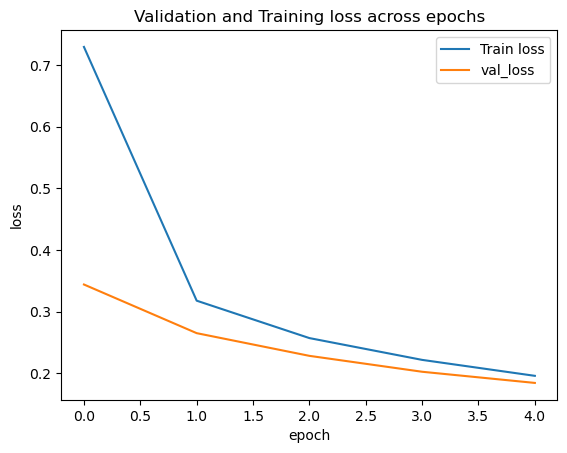

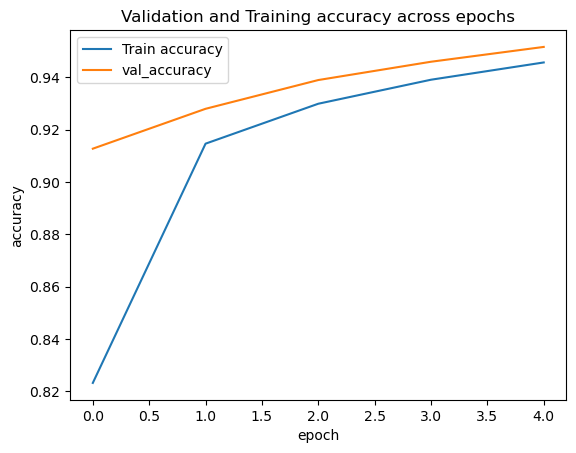

In [46]:
plot_learning(history_2)

- Learning curves might be difficult to assess over this many epochs.
- Maybe we actually want more frequent updates? Say `batch_size`=16
- Try reducing `learning_rate` still further to 1e-5? 

In [47]:
test_probs_2 = model_2.predict(X_test_norm) 
test_preds_2 = np.argmax(test_probs_2, 1) 

cm2 = tf.math.confusion_matrix(test_preds_2, y_test, num_classes=10) 
cm2

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    6,    0,    1,    7,    8,    1,    4,    9],
       [   0, 1118,    2,    0,    1,    1,    3,    6,    3,    6],
       [   0,    3,  974,   15,    6,    0,    3,   20,    8,    1],
       [   1,    2,    8,  956,    0,   19,    0,    8,   17,   13],
       [   0,    1,    8,    0,  937,    4,    8,    6,    9,   21],
       [   3,    1,    2,   14,    0,  829,   11,    1,   15,    5],
       [   9,    3,    5,    0,    6,   11,  922,    0,   10,    1],
       [   2,    2,    9,   10,    2,    3,    1,  959,   11,    9],
       [   1,    5,   15,    9,    4,   10,    2,    0,  887,    4],
       [   0,    0,    3,    6,   25,    8,    0,   27,   10,  940]],
      dtype=int32)>

#### Run II 

> Same parameters as `model_2` but running for 50 epochs

In [50]:
from tensorflow.keras.models import clone_model 

model_2_ii = clone_model(model_2)

# reduce learning_rate to 1e-5 
opt_2_ii = Adam(learning_rate=1e-5) 

model_2_ii.compile(
    optimizer=opt_2_ii, 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] 
) 

model_2_ii.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
history_2_ii = model_2_ii.fit(
    X_train_norm,
    y_train,
    epochs=50, 
    validation_split=0.2,
    batch_size=32, # back to default 
    shuffle=True
) 

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6792 - accuracy: 0.5734 - val_loss: 1.1022 - val_accuracy: 0.8070
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.8705 - accuracy: 0.8231 - val_loss: 0.6580 - val_accuracy: 0.8618
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6024 - accuracy: 0.8633 - val_loss: 0.4994 - val_accuracy: 0.8848
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4888 - accuracy: 0.8800 - val_loss: 0.4233 - val_accuracy: 0.8962
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4268 - accuracy: 0.8910 - val_loss: 0.3790 - val_accuracy: 0.9047
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3873 - accuracy: 0.8992 - val_loss: 0.3492 - val_accuracy: 0.9103
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3595 - accuracy: 0.9049 - val_loss: 0.3281 - val_accuracy:

In [52]:
model.save("../models/tf_multiclass/2_ii/")

INFO:tensorflow:Assets written to: ../models/tf_multiclass/2_ii/assets


INFO:tensorflow:Assets written to: ../models/tf_multiclass/2_ii/assets
